# Sentence Embeddings

In [1]:
from sentence_transformers import SentenceTransformer, util
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
import numpy as np
# 'dmsloc', 'ctxcol', 'interdmsctgABBA', '1backloc'
# ins_mapping = {"dmsloc": 'Do stimulus 1 and 2 match in LOCATION?',
#                '1backloc': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in LOCATION ?',
#                'ctxcol': 'If stimuli 1 and 2 match in CATEGORY, match stimuli 2 and 3 based on IDENTITY, otherwise on LOCATION.',
#                'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
            #    }



# ins_mapping = {
#                '1backloc': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in LOCATION ?',
#                '1backctg': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in CATEGORY ?',
#                '1backobj': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in IDENTITY ?',
#                'ctxlco': 'If stimuli 1 and 2 match in LOCATION, match stimuli 2 and 3 based on CATEGORY, otherwise on IDENTITY.',
#                'ctxcol': 'If stimuli 1 and 2 match in CATEGORY, match stimuli 2 and 3 based on IDENTITY, otherwise on LOCATION.',
#                'interdmslocABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on IDENTITY. Respond as fast as you can',
#                'interdmslocABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on IDENTITY. Respond as fast as you can',
#                }




ins_mapping = {
               '1backloc': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on LOCATION. Respond as fast as you can',
               '1backctg': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on CATEGORY. Respond as fast as you can',
               '1backobj': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on IDENTITY. Respond as fast as you can',
               'ctxlco': 'If stimuli 1 and 2 match in LOCATION, match stimuli 2 and 3 based on CATEGORY, otherwise on IDENTITY.',
               'ctxcol': 'If stimuli 1 and 2 match in CATEGORY, match stimuli 2 and 3 based on IDENTITY, otherwise on LOCATION.',
               'interdmslocABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on LOCATION. Respond as fast as you can',
               'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
               'interdmsobjABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on IDENTITY. Respond as fast as you can',
               'interdmslocABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on LOCATION. Respond as fast as you can',
               'interdmsctgABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on CATEGORY. Respond as fast as you can',
               'interdmsobjABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on IDENTITY. Respond as fast as you can',
               }

# ins_mapping = {
#                '1backloc': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on LOCATION. Respond as fast as you can',
#                '1backctg': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on CATEGORY. Respond as fast as you can',
#                '1backobj': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on IDENTITY. Respond as fast as you can',
#                'interdmslocABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on IDENTITY. Respond as fast as you can',
#                'interdmslocABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on IDENTITY. Respond as fast as you can',
#                }

tasks = ['1backloc', '1backctg', '1backobj', 'ctxlco' , 'ctxcol', 
       'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
       'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 

# tasks = ['1backloc', '1backctg', '1backobj', 
#        'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
#        'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 

task_features= {'loc':['1backloc', 'interdmslocABAB', 'interdmslocABBA'], 
                 'ctg':['1backctg', 'interdmsctgABAB','interdmsctgABBA' ], 
                 'obj':['1backobj', 'interdmsobjABAB', 'interdmsobjABBA']}

# tasks = ['ctxcol', 'ctxlco' ,
#        'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
#        'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 

# tasks = task_features['ctg']

# sort tasks using ins_mapping dictionary keys
tasks.sort(key=lambda x: list(ins_mapping.keys()).index(x))

def pairwise_pearsonr(data):
    num_vars = data.shape[0]
    correlations = np.zeros((num_vars, num_vars))
    
    for i in range(num_vars):
        for j in range(num_vars):
            if i == j:
                correlations[i, j] = 1.0  # Diagonal elements (correlation with itself) are always 1
            else:
                correlations[i, j], _ = pearsonr(data[i, : ], data[j, :])
    
    return correlations

def sentence_similarity(sentences, model):
    # Compute embeddings
    embeddings = model.encode(sentences, convert_to_tensor=True)
    

    # Compute cosine-similarities for each sentence with each other sentence
    scores = util.cos_sim(embeddings, embeddings)
    # embeddings = embeddings.cpu().numpy()
    # scores =  np.log(euclidean_distances(embeddings, embeddings))

    # pearsonr_scores = np.array([])
    # # Compute pearson correlation over all sentence embeddings
    # for i in range(embeddings.shape[0]):
    #     pearsonr_score = np.ones(2,) - pearsonr(embeddings[i], embeddings[i])
    #     pearsonr_scores = np.append(pearsonr_scores, pearsonr_score)

    # print(pearsonr_scores.reshape(embeddings.shape[0], embeddings.shape[0]))

    return scores

([<matplotlib.axis.YTick at 0x34fe626b0>,
 [Text(0, 0, '1backloc'),
  Text(0, 1, '1backctg'),
  Text(0, 2, '1backobj'),
  Text(0, 3, 'ctxlco'),
  Text(0, 4, 'ctxcol'),
  Text(0, 5, 'interdmslocABBA'),
  Text(0, 6, 'interdmsctgABBA'),
  Text(0, 7, 'interdmsobjABBA'),
  Text(0, 8, 'interdmslocABAB'),
  Text(0, 9, 'interdmsctgABAB'),
  Text(0, 10, 'interdmsobjABAB')])

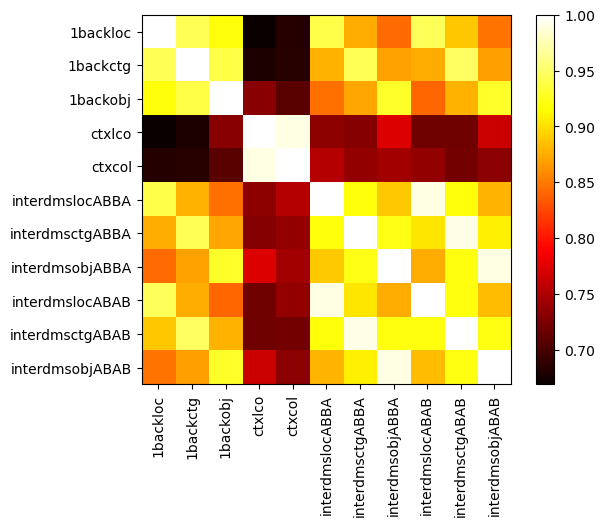

In [2]:
model = SentenceTransformer("all-MiniLM-L6-v2")

instructions = [ins for name,ins in list(ins_mapping.items()) if name in tasks]
names = [name for name,ins in list(ins_mapping.items()) if name in tasks]

setence_rsm = sentence_similarity(instructions, model).cpu().numpy()

# Create a heatmap from the RSM with ticklabels as sentences
plt.imshow(setence_rsm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names, )


# Binary Mask

([<matplotlib.axis.YTick at 0x352680e20>,
 [Text(0, 0, '1backloc'),
  Text(0, 1, '1backctg'),
  Text(0, 2, '1backobj'),
  Text(0, 3, 'ctxlco'),
  Text(0, 4, 'ctxcol'),
  Text(0, 5, 'interdmslocABBA'),
  Text(0, 6, 'interdmsctgABBA'),
  Text(0, 7, 'interdmsobjABBA'),
  Text(0, 8, 'interdmslocABAB'),
  Text(0, 9, 'interdmsctgABAB'),
  Text(0, 10, 'interdmsobjABAB')])

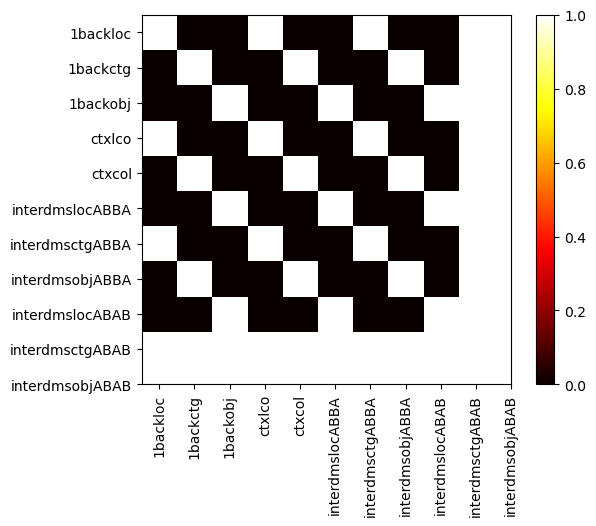

In [3]:
n_tasks = len(tasks)
n_feature_bins = 3 + 3*2 # = 11

# Empty Mask

loc_mask = np.zeros((n_feature_bins, n_feature_bins))
cat_mask = np.zeros((n_feature_bins, n_feature_bins))
obj_mask = np.zeros((n_feature_bins, n_feature_bins))

# Fill in the loc mask
loc_mask[0, 0] = 1
loc_mask[0, 3] = 1
loc_mask[3, 0] = 1
loc_mask[0, 6] = 1
loc_mask[6, 0] = 1

loc_mask[3, 3] = 1
loc_mask[3, 6] = 1
loc_mask[6, 3] = 1
loc_mask[6, 6] = 1

# Fill in the cat mask
cat_mask[1, 1] = 1
cat_mask[1, 4] = 1
cat_mask[4, 1] = 1
cat_mask[1, 7] = 1
cat_mask[7, 1] = 1

cat_mask[4, 4] = 1
cat_mask[4, 7] = 1
cat_mask[7, 4] = 1
cat_mask[7, 7] = 1

# Fill in the obj mask
obj_mask[2, 2] = 1
obj_mask[2, 5] = 1
obj_mask[5, 2] = 1
obj_mask[2, 8] = 1
obj_mask[8, 2] = 1

obj_mask[5, 5] = 1
obj_mask[5, 8] = 1
obj_mask[8, 5] = 1
obj_mask[8, 8] = 1

# Add all masks together
mask = loc_mask + cat_mask + obj_mask

# Plot the mask
plt.imshow(mask, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names, )



# Brain Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import os
import surfplot
import nibabel as nib
import h5py
import scipy.stats as stats
import sklearn.svm as svm
import sklearn
from neuromaps.datasets import fetch_fslr
from statsmodels.stats.multitest import fdrcorrection
%matplotlib inline


#### Read roi labels

In [5]:
# Load parameters + data # data/data/glasser_data_glm_then_concat/glm_betas/sub-03/correct_ses5_task-interdmsctgABBA_run-02.csv
subj = 'sub-03'
runs = ['run-01', 'run-02', 'run-03', 'run-04', 'run-05']
sessions = ['ses1', 'ses2', 'ses3', 'ses4', 'ses5', 'ses6', 'ses7', 'ses8', 'ses9', 'ses10', 'ses11', 'ses12', 'ses13', 'ses14', 'ses15', 'ses16']
cwd = os.getcwd()

# Get the path of the parent directory
parent_dir = '/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI' # os.path.abspath(os.path.join(cwd, os.pardir))

basedir = parent_dir
datadir = parent_dir + '/data/data/glasser_data_glm_then_concat/glm_betas/' + subj + '/'
glasser_atlas_str= basedir + '/data/Glasser_LR_Dense64k.dlabel.nii'
glasser_atlas = nib.load(glasser_atlas_str).get_fdata()[0].astype(int)
print(glasser_atlas.shape)
num_regions = 360

(64984,)


#### Read betas

In [6]:
task_betas = {}
df_conditions = {} # 'task-dmsloc_run-01'

for task in tasks:
    for sess in sessions:
        for run in runs:
            try:
                h5f = h5py.File(datadir + 'normalizedcorrecttrial_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '_betas.h5','r')
                try: 
                    task_betas[task][sess][run] = h5f['betas'][:].copy()
                    df_conditions[task][sess][run] = pd.read_csv(datadir + 'correcttrial_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '.csv')
                except Exception as e:
                    try:
                        task_betas[task][sess] = {}
                        task_betas[task][sess][run] = h5f['betas'][:].copy()
                        df_conditions[task][sess] = {}
                        df_conditions[task][sess][run] = pd.read_csv(datadir + 'correcttrial_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '.csv')
                    except Exception as e:
                        task_betas[task] = {}
                        task_betas[task][sess] = {}
                        task_betas[task][sess][run] = h5f['betas'][:].copy()
                        df_conditions[task]= {}
                        df_conditions[task][sess] = {}
                        df_conditions[task][sess][run] = pd.read_csv(datadir + 'correcttrial_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '.csv')
                h5f.close()
            except Exception as e:
                print(e)
                continue


[Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/data/data/glasser_data_glm_then_concat/glm_betas/sub-03/normalizedcorrecttrial_glmmethod1_ses1_task-1backloc_run-02_betas.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
[Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/data/data/glasser_data_glm_then_concat/glm_betas/sub-03/normalizedcorrecttrial_glmmethod1_ses1_task-1backloc_run-03_betas.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
[Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/data/data/glasser_data_glm_then_concat/glm_betas/sub-03/normalizedcorrecttrial_glmmethod1_ses1_task-1backloc_run-04_betas.h5', errno = 2, error message = 'No such file or dire

### Isolate first delay betas

In [7]:
filtered_task_betas = task_betas.copy()

for task in task_betas.keys():
    for sess in task_betas[task].keys():
        for run in task_betas[task][sess].keys():
            task_df = df_conditions[task][sess][run]
            filtered_df = task_df[task_df['prev_stimulus'] == 1000]

            betas  = task_betas[task][sess][run]
            betas = betas[:, filtered_df['Unnamed: 0'].to_numpy()]

            filtered_task_betas[task][sess][run] = betas

task_betas = filtered_task_betas

#### Region Mapping

In [8]:
map_df_lh = pd.read_excel(basedir + '/data/Glasser_2016_Table.xlsx')
map_df_lh = map_df_lh.iloc[:,0:2]

# Insert row with region 0
map_df_lh.loc[-1] = [0, 'LG']
map_df_lh.index = map_df_lh.index + 1  # shifting index
map_df_lh.sort_index(inplace=True)

# Rename columns
map_df_lh.columns = ['region_id', 'region_name']

map_df_rh = map_df_lh.copy()

# Increase map_df_rh region_id by 180 and index by 180
map_df_rh['region_id'] = map_df_rh['region_id'] + 180
map_df_rh.index = map_df_rh.index + 180

# Concatenate both hemispheres
map_df = pd.concat([map_df_lh, map_df_rh], axis=0)

map_df

,region_id,region_name
0,0,LG
1,1,V1
2,2,MST
3,3,V6
4,4,V2
...,...,...
356,356,STSva
357,357,TE1m
358,358,PI
359,359,a32pr


In [9]:
# check unique values in the region_id column
map_df

,region_id,region_name
0,0,LG
1,1,V1
2,2,MST
3,3,V6
4,4,V2
...,...,...
356,356,STSva
357,357,TE1m
358,358,PI
359,359,a32pr


In [10]:
mapped_atlas = {}

for id, name in zip(map_df['region_id'], map_df['region_name']):
    # indexes of id in glasser_atlas
    if str(name) not in mapped_atlas.keys():
        mapped_atlas[str(name)] = np.where(glasser_atlas == id)[0]
    else:
        mapped_atlas[str(name)] = np.concatenate((mapped_atlas[str(name)], np.where(glasser_atlas == id)[0]))

#### Mask betas

In [11]:
task_betas.keys()

dict_keys(['1backloc', '1backctg', '1backobj', 'ctxlco', 'ctxcol', 'interdmslocABBA', 'interdmsctgABBA', 'interdmsobjABBA', 'interdmslocABAB', 'interdmsctgABAB', 'interdmsobjABAB'])

In [12]:
indexes = mapped_atlas['LG']

for task in task_betas.keys():
    # Across each session
    for sess in task_betas[task].keys():
        # Across each run
        for run in task_betas[task][sess].keys():
            if task == 'dmsloc' and sess == 'ses16' and run == 'run-01':
                print(task_betas[task][sess][run][indexes[0]])

In [13]:
mapped_betas_dict = {}
avg_betas_dict = {}

# Across each region
for name, indexes in mapped_atlas.items():
    mapped_betas_dict[name] = {}
    avg_betas_dict[name] = {}

    # Across each task
    for task in task_betas.keys():
        mapped_betas_dict[name][task] = {}
        sess_betas = torch.tensor([])

        # Across each session
        for sess in task_betas[task].keys():
            mapped_betas_dict[name][task][sess] = {}
            run_betas = torch.tensor([])

            # Across each run
            for run in task_betas[task][sess].keys():
                # Betas for all trials
                betas = torch.tensor(task_betas[task][sess][run][indexes])

                # Check if betas is all zeros
                if torch.sum(betas) == 0 and name != 'LG':
                    print('Found all zeros for ' + name + ' ' + task + ' ' + sess + ' ' + run)
                    continue

                # Mean beta across trials
                trial_avg_betas = torch.mean(betas, axis=1).unsqueeze(1)
                
                # Add mean beta across trials
                mapped_betas_dict[name][task][sess][run] = trial_avg_betas

                # Add to run_betas
                run_betas = torch.cat((run_betas, trial_avg_betas), axis=1)
            
            # Check if run_betas is not empty
            if run_betas.shape[0] != 0:
                run_betas = torch.mean(run_betas, axis=1).unsqueeze(1)
                sess_betas = torch.cat((sess_betas, run_betas), axis=1)
            else:
                print('no data at: ', name, task, sess, run)
        sess_betas = torch.mean(sess_betas, axis=1)  
        avg_betas_dict[name][task] = sess_betas


#### Make RSMs

In [14]:
brain_rsms = {}
for name in avg_betas_dict.keys():
    betas = torch.stack(list(avg_betas_dict[name].values()))
    brain_rsms[name] = util.cos_sim(betas, betas).numpy() #   np.log(euclidean_distances(betas, betas)) 

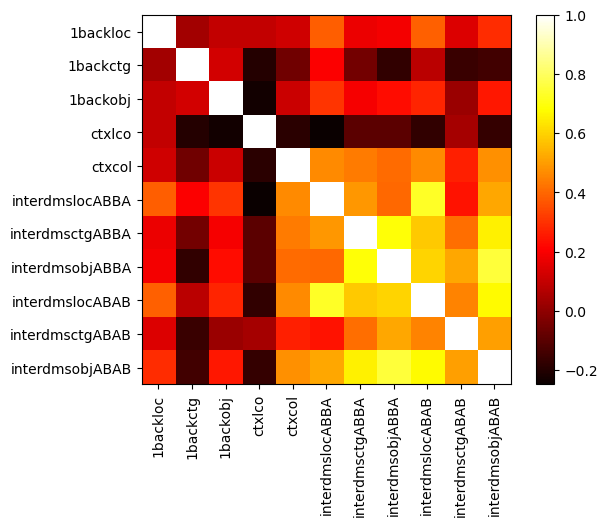

In [15]:
area = 'V1'

# Plot v1_betas_rdm with ticklabels as sentences
plt.imshow(brain_rsms[area], cmap='hot', interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
_ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())

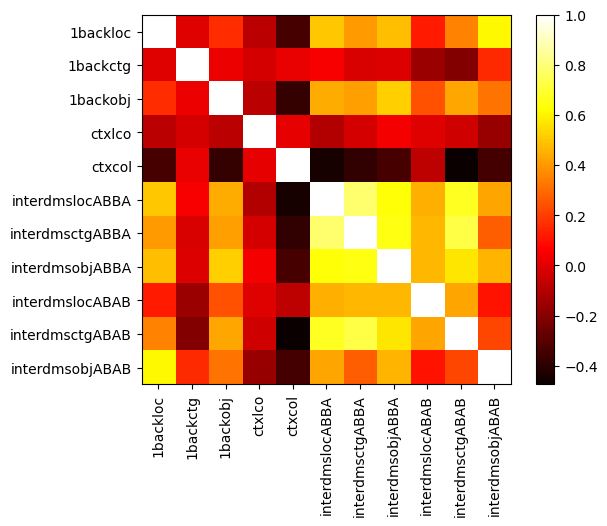

In [16]:
# Iterate over all regions
for area in brain_rsms.keys():
    # Plot v1_betas_rdm with ticklabels as sentences
    plt.clf()
    plt.imshow(brain_rsms[area], cmap='hot', interpolation='nearest')
    plt.colorbar()
    _ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
    _ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())
    plt.savefig('/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/tasks/4.2 - NLP Similarity/figures/' + area + '.png')

In [17]:
brain_rsms[area].shape

(11, 11)

#### Compare RDMS

In [18]:
import numpy as np
from scipy.stats import pearsonr

def compare_rsms(rdm1, rdm2):
    # Flatten the RSMs
    rdm1_flat = rdm1.flatten()
    rdm2_flat = rdm2.flatten()
    
    # Compute Pearson correlation
    correlation, _ = pearsonr(rdm1_flat, rdm2_flat)
    
    return correlation

rsms_comp = {}
for name in brain_rsms.keys():
    # Get upper triangular part of the RSMs
    triu_setence_rsm = setence_rsm[np.triu_indices(setence_rsm.shape[0], k=1)]  # mask[np.triu_indices(mask.shape[0], k=1)]
    triu_brain_rsm = brain_rsms[name][np.triu_indices(brain_rsms[name].shape[0], k=1)]


    sim = compare_rsms(triu_setence_rsm, triu_brain_rsm)
    if sim > 0.9995:
        print(name, sim)
    rsms_comp[name] = sim

# Create a bar plot of the RSMs comparison
# plt.bar(rsms_comp.keys(), rsms_comp.values())
rsms_comp['LG'] = np.nan

In [19]:
# sort the rsms_comp dictionary by value
rsms_comp = dict(sorted(rsms_comp.items(), key=lambda item: item[1]))

# Print the top 5 dictionary values along with their key
for key in list(rsms_comp.keys())[-5:]:
    print(key, rsms_comp[key])

PGs 0.842388213987439
31a 0.8455891237347458
FEF 0.8501984955791799
s6-8 0.8593971839079727
PHT 0.8741347987983643


In [20]:
# Get all keys from rsms_comp dictionary that have a '47' i them
[key for key in rsms_comp.keys() if '47' in key]

['a47r', 'p47r', '47s', '47l', '47m']

In [21]:
rsms_comp['31a']

0.8455891237347458

In [22]:
rsms_comp['PHT']

0.8741347987983643

In [23]:
max(list(rsms_comp.values())[1:])

0.8741347987983643

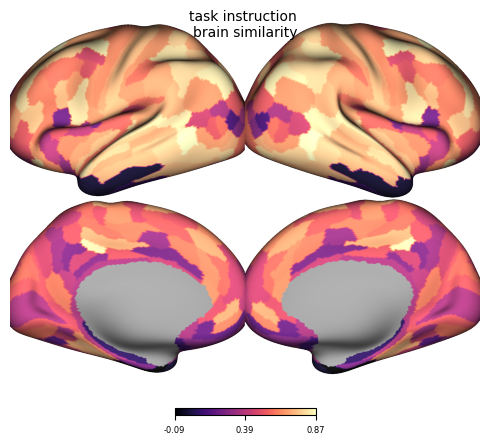

In [24]:
from neuromaps.datasets import fetch_fslr

# Fetch the fsLR atlas
surfaces = fetch_fslr()
lh, rh = surfaces['veryinflated']
surface_dat = np.zeros((len(glasser_atlas),))

count_regs = 0

# Create a surface data array
for name, indexes in mapped_atlas.items():
    count_regs = count_regs + len(indexes)
    sim_repeated = np.array([rsms_comp[name]]*len(indexes))

    surface_dat[indexes] = np.nan_to_num(sim_repeated)

p = surfplot.Plot(lh,rh,size=(1000,750),zoom=1.8)
p.add_layer(surface_dat.T,cmap='magma',color_range=[np.min(surface_dat), np.max(surface_dat)])  
fig = p.build(figsize=(5,5),colorbar=True,cbar_kws={'fontsize':6})
fig.suptitle('task instruction \nbrain similarity',y=0.88,fontsize=10)
fig.tight_layout()
fig.savefig('task_ins_similarity.png',dpi=300)


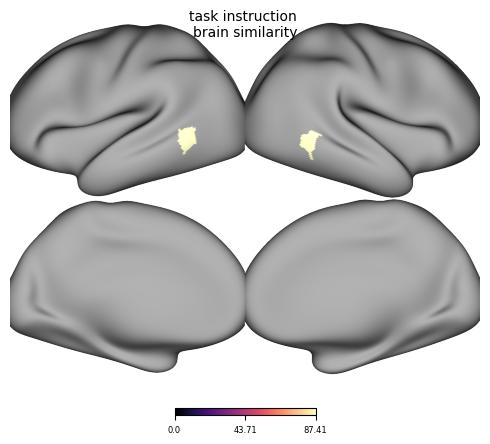

In [25]:
from neuromaps.datasets import fetch_fslr

# Fetch the fsLR atlas
surfaces = fetch_fslr()
lh, rh = surfaces['veryinflated']
surface_dat = np.zeros((len(glasser_atlas),))

count_regs = 0

# Create a surface data array
for name, indexes in mapped_atlas.items():
    count_regs = count_regs + len(indexes)
    sim_repeated = np.array([rsms_comp[name]*100]*len(indexes))

    if name in ['PHT']:
        surface_dat[indexes] = np.nan_to_num(sim_repeated)

p = surfplot.Plot(lh,rh,size=(1000,750),zoom=1.8)
p.add_layer(surface_dat.T,cmap='magma',color_range=[np.min(surface_dat), np.max(surface_dat)])  
fig = p.build(figsize=(5,5),colorbar=True,cbar_kws={'fontsize':6})
fig.suptitle('task instruction \nbrain similarity',y=0.88,fontsize=10)
fig.tight_layout()
fig.savefig('task_ins_similarity.png',dpi=300)


In [40]:
# from neuromaps.datasets import fetch_fslr

# # Fetch the fsLR atlas
# surfaces = fetch_fslr()
# lh, rh = surfaces['veryinflated']
# surface_dat_tmp = np.zeros((len(glasser_atlas),))

# v1_indexes = mapped_atlas['V1']
# v1_sim = np.array([rsms_comp['V1']]*len(v1_indexes))

# surface_dat_tmp[v1_indexes] = v1_sim

# p = surfplot.Plot(lh,rh,size=(500,350),zoom=1.8)
# p.add_layer(surface_dat_tmp.T,cmap='magma',color_range=[np.min(surface_dat_tmp), np.max(surface_dat_tmp)], as_outline=True)  
# fig = p.build(figsize=(1.75,1.75),colorbar=True,cbar_kws={'fontsize':6})